# Data-Driven Crop Recommendation Model

## Objective
The primary goal of this project is to develop a machine learning model that recommends the most suitable crop to grow based on soil nutrients (N, P, K), pH, temperature, humidity, and rainfall.

The system helps farmers make data-driven decisions to maximize yield and reduce crop failure.

It leverages classification models to predict the best crop category from a predefined set.

## Tools & Technologies Used
Programming Language: Python

Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn.

Development Environment: Google Colab

Version Control: Git & GitHub

Optional Deployment: Streamlit (for creating a web app)

## Skills Covered
This project showcases the following Data Science & Machine Learning skills:

Data Preprocessing:

Handling numerical features (scaling) and categorical encoding.

Exploratory Data Analysis (EDA):

Understanding relationships between soil nutrients, weather conditions, and crop type.

Visualizing feature distributions and correlations.

Machine Learning (Classification):

Building baseline models ( Decision Tree, Random Forest).

Model evaluation (accuracy, confusion matrix, classification report).

Feature Importance Analysis:

Identifying which parameters (e.g., rainfall, pH) impact crop prediction.

Model Deployment (Optional):

Saving trained model (.pkl) for real-world usage via web apps.


Version Control & Documentation:

GitHub project structure, README, and visualization of results.

## 1. Project Setup Section

Import all required libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


## 2. Load Dataset
Load crop_dataset.csv dataset.

Check dataset shape, first 5 rows (df.head()), column names, and data types.

In [2]:
# Load the dataset (upload the CSV file)
from google.colab import files
uploaded = files.upload()
# read the dataset
df = pd.read_csv("crop_dataset.csv")
print("Shape of dataset:", df.shape)
df.head()


Saving crop_dataset.csv to crop_dataset.csv
Shape of dataset: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Overview of the dataset:
This dataset is a collection of agricultural data, likely used for predicting which crop to grow. It has 2200 rows (different data entries) and 8 columns (different types of information).

Here's a breakdown of the columns:

N, P, K: These probably represent the levels of Nitrogen, Phosphorus, and Potassium in the soil, which are crucial nutrients for plants.

temperature: The temperature of the environment.

humidity: The amount of moisture in the air.

ph: The acidity or alkalinity of the soil.

rainfall: The amount of rain received.

label: This is the most important column, as it tells us what crop was grown (e.g., "rice" in the examples shown).

In short, this dataset contains various environmental and soil conditions, along with the specific crop that was successfully grown under those conditions.

## 3. Data Understanding & EDA

### Step 1: Check for Missing Values

In [3]:
# Check if there are any missing values
df.isnull().sum()


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


### Insight:
The Dataset typically has no missing values, meaning we don’t need imputation.

### Step 2: Describe Numerical Features
count: Number of entries in each column.

mean, std: Average and standard deviation.

min, 25%, 50%, 75%, max: Spread of the data.

In [4]:
# Statistical summary of numerical features
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Insight:
This is a summary of the data, showing the average, spread, and range for each measurement.

Count: All measurements have 2200 entries, meaning there's complete data for everything.

Mean (Average): For example, the average Nitrogen (N) level is about 50, temperature is about 25 degrees, humidity is about 71%, pH is around 6.4, and rainfall is about 103 mm.

Std (Spread): This tells you how much the data varies. For instance, N and K levels vary quite a bit (large std), while temperature is more consistent (smaller std).

Min/Max (Range): These show the lowest and highest values recorded. For example, Nitrogen goes from 0 to 140, temperature from 8.8 to 43.6 degrees, and rainfall from 20 to 298 mm.

25%, 50%, 75% (Quartiles): These tell you where most of the data lies. For example, 50% of the N values are below 37, and 75% are below 84.25.

In short, it tells you the typical conditions and the full range of conditions present in the dataset for growing crops.

## Step 3: Class Distribution
Shows how many records exist for each crop (e.g., 100 samples for rice, 100 for chickpea).

In [5]:
# Count how many samples are there for each crop
df['label'].value_counts()


,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


## Insight:
This dataset is balanced (each crop class has equal records), so we don't need oversampling or undersampling.

**Note**: Oversampling: Making more copies of data from the minority class so that all classes have similar amounts of data.

Undersampling: Removing data from the majority class so that all classes have similar amounts of data.

(In short: both are methods to balance the dataset when some classes have much more data than others.)

## Step 4: Checking for Duplicates
Duplicate rows can bias the model (e.g., one crop appearing too often, giving it more weight).

Removing them ensures data integrity.

In [6]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Insight:
This dataset has no duplicate values which means data is unbaiased and data integrity is ensured.

## Step 5: Checking for Outliers
For numerical columns like N, P, K, temperature, humidity, ph, rainfall, we can check outliers using either:

**IQR method (statistical approach)**

This tells us how many extreme values each feature has.

If outliers are very few and not meaningful, we can remove them or cap them.

**Boxplots (visual approach)**

Points outside the whiskers (extreme dots) are potential outliers.

A few outliers may be natural (e.g., extreme rainfall), so we remove only those that don't make sense (e.g., negative values).

In [7]:
#IQR method
# Function to detect outliers using IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    outliers = detect_outliers(df, feature)
    print(f"{feature} -> {len(outliers)} outliers")


N -> 0 outliers
P -> 138 outliers
K -> 200 outliers
temperature -> 86 outliers
humidity -> 30 outliers
ph -> 57 outliers
rainfall -> 100 outliers


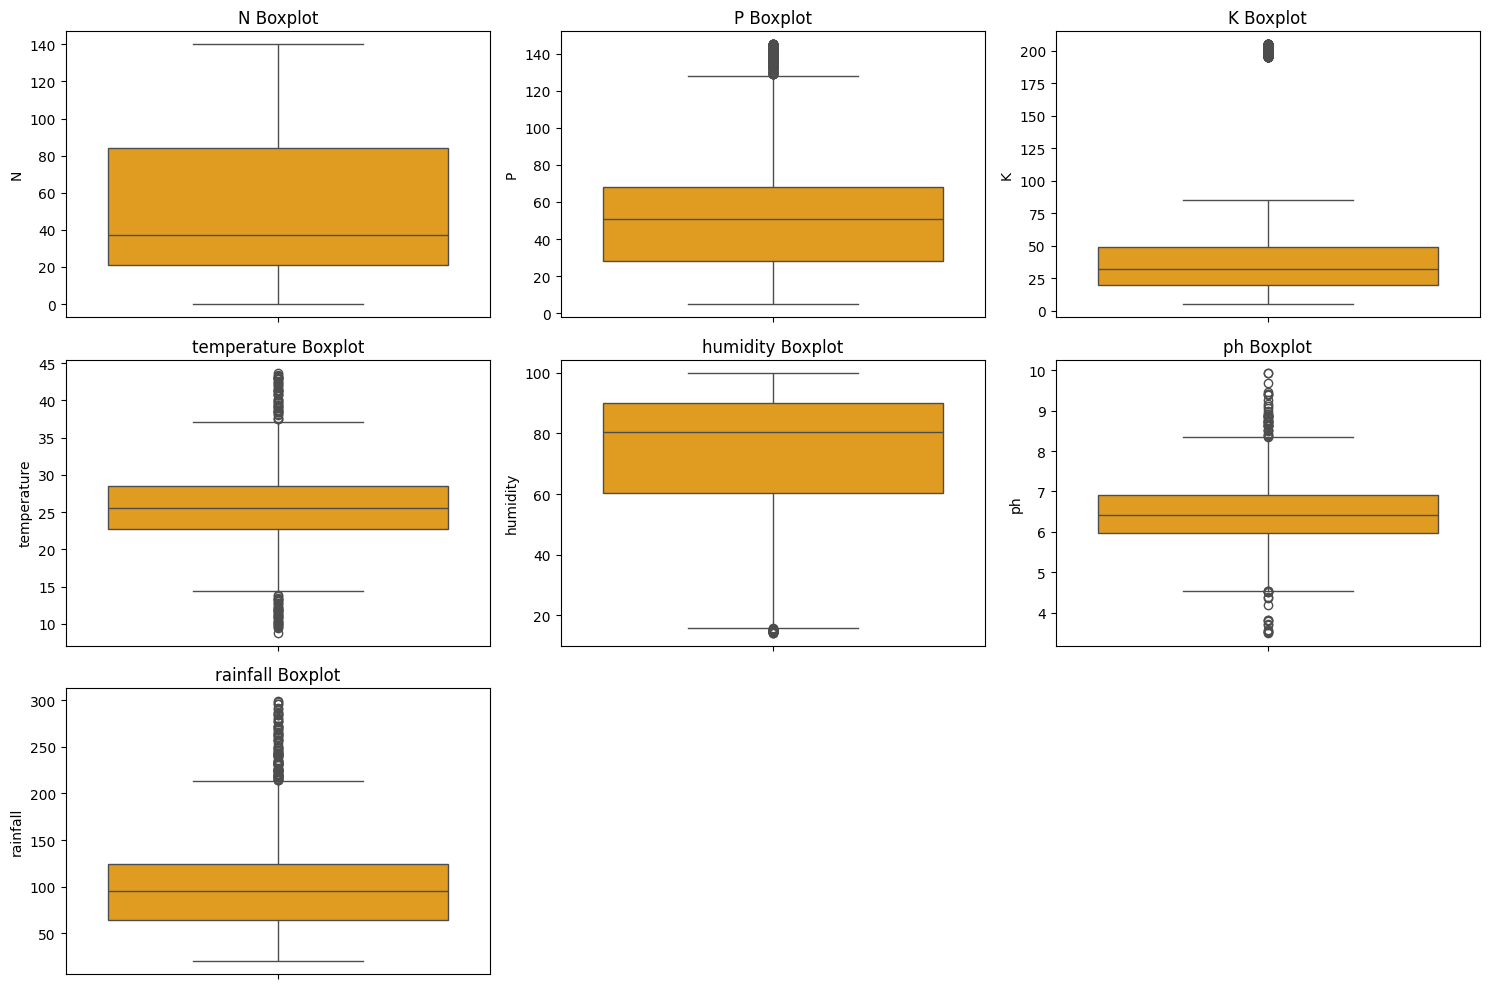

In [8]:
# Boxplot Visualization
import matplotlib.pyplot as plt
import seaborn as sns

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(15,10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[feature], color='orange')
    plt.title(f'{feature} Boxplot')
plt.tight_layout()
plt.show()


### Outlier Analysis and Decision:
I found outliers in several columns of your dataset. Now the question is: Do we remove or handle them?

Outliers in N, P, K (soil nutrients) might be due to unusual soil conditions or errors.

Outliers in temperature, humidity, rainfall may represent rare weather conditions.

Removing or  limit all outliers to max allowed range  may lose valuable crop-specific patterns, especially since some crops naturally require extreme values.

So here, We will keep outliers to preserve crop diversity.

In [9]:
# We will KEEP outliers to preserve crop diversity.
print("\nDecision: Outliers are realistic variations in crop data, so we will keep them.")


Decision: Outliers are realistic variations in crop data, so we will keep them.


## Step 6: Visualizations
The purpose of visualizations is to understand the patterns, relationships, and distributions of features in the dataset before applying machine learning models.
**In this dataset:**

**Target Variable:**

label – the type of crop (e.g., rice, wheat, maize, etc.).

This is a categorical variable with 22 crop classes.

**Input Features (Independent Variables):**

N – Nitrogen content in soil

P – Phosphorus content in soil

K – Potassium content in soil

temperature – Temperature in °C

humidity – Humidity in %

ph – Soil pH value

rainfall – Rainfall in mm

**Why Visualizations Are Needed?**

To understand how numerical features are distributed (e.g., pH range).

To check correlations between soil & weather parameters.

To identify patterns (e.g., which crops thrive at certain humidity levels).

### 1. Understanding Numerical Feature Distributions

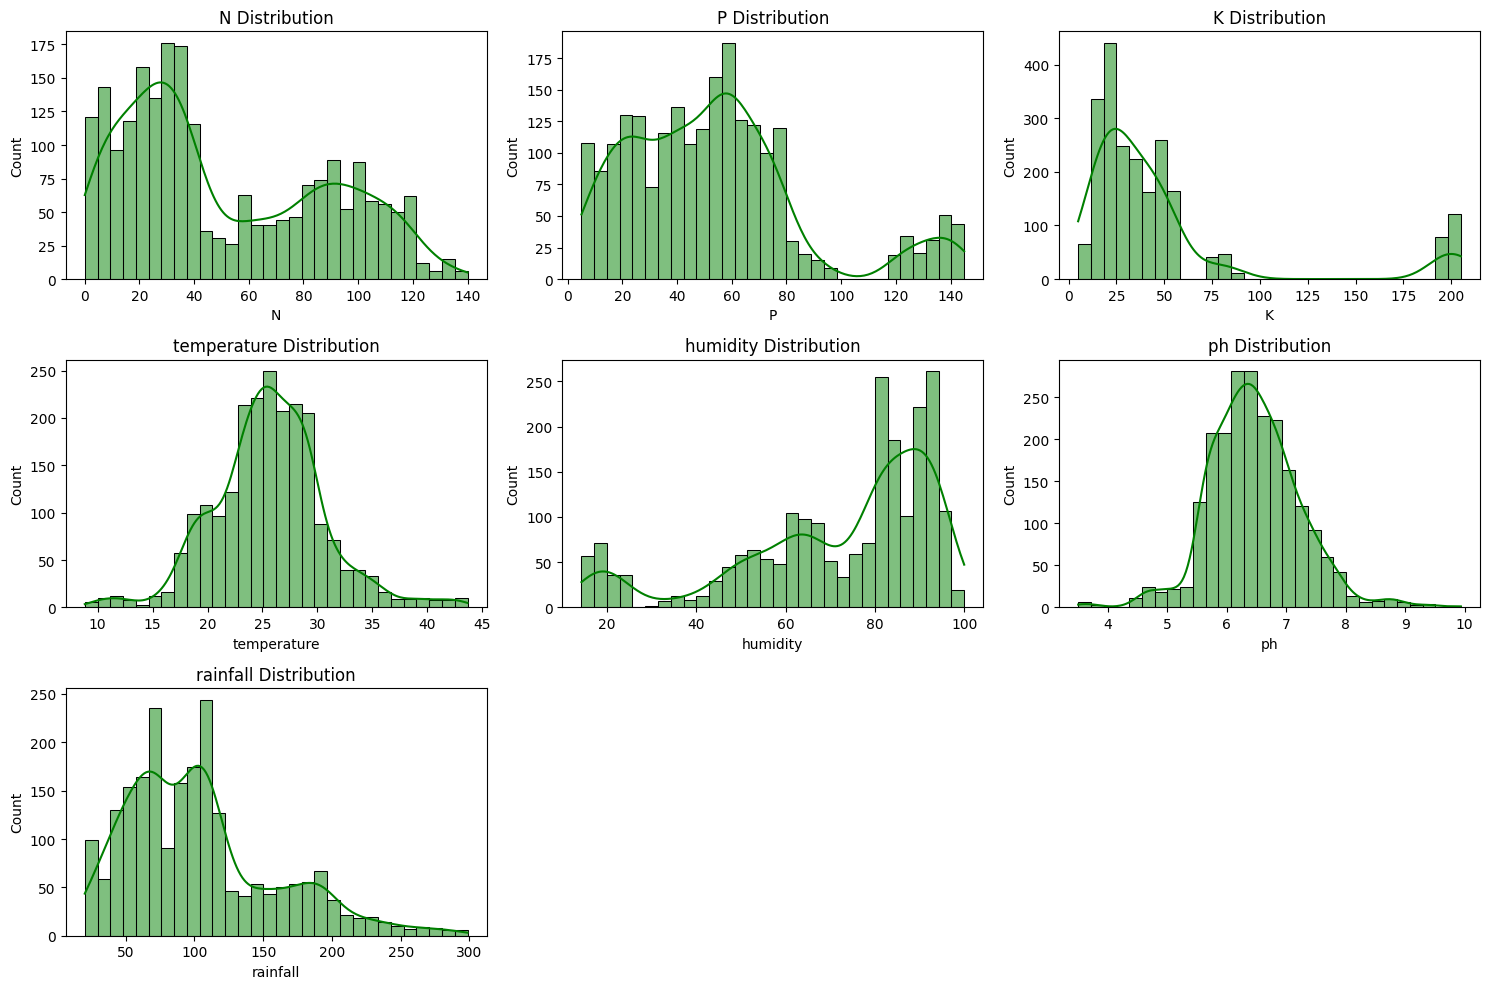

In [10]:
# Plot distribution of each numerical feature
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(15,10))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='green')
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


### Insights:
**1. Nitrogen (N):**
This chart shows that Nitrogen levels in the soil tend to be either low (around 20-40) or high (around 80-100), with fewer in between.

**2. Phosphorus (P):**
This graph shows that Phosphorus (P) levels in the soil are mostly found around 50-60, but there's also another smaller group around 130-140.

**3. Potassium (K):**
Potassium (K) levels in the soil are either mostly very low or, in some cases, very high, indicating specific crops might thrive at these extreme levels.

**4. Temperature:**
This graph shows that most of the temperatures in the dataset are clustered around 25-30 degrees, with fewer instances of very cold or very hot temperatures.

**5. Humidity:**
This chart shows that humidity levels in the data are mostly very high (around 80-95), with some instances of very low humidity, and fewer in the middle.

**6. pH:**
This graph shows that the soil pH levels in the dataset are mostly neutral to slightly acidic, clustering around 6 to 7.

**7. Rainfall:**
This graph shows that the soil pH levels in the dataset are mostly neutral to slightly acidic, clustering around 6 to 7.


### 2. Correlation Between Soil & Weather Parameters

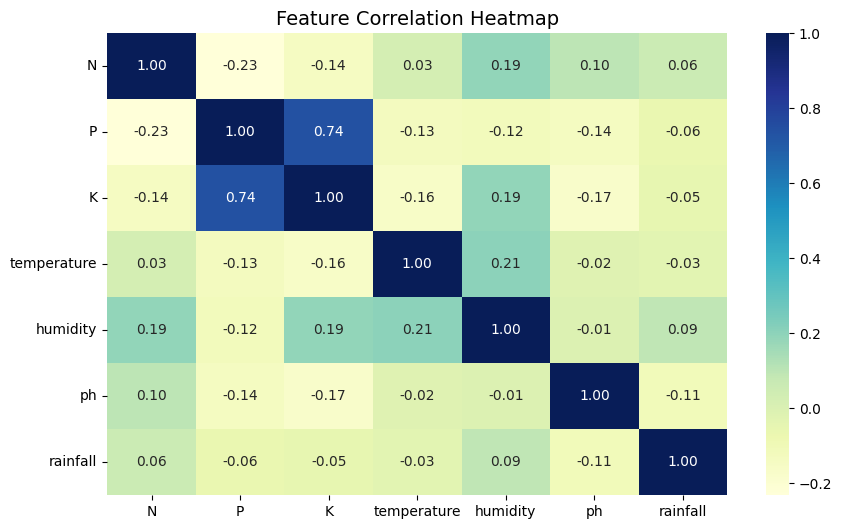

In [11]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()



### Insight:
The correlation heatmap shows:

P and K (Phosphorus and Potassium) are strongly linked: If one is high, the other tends to be high too.it means they often appear together in similar amounts. So, if you find soil with high Phosphorus, it's very likely to also have high Potassium. This might indicate a certain type of soil or conditions where specific crops thrive.

When other factors don't affect each other much (like N and temperature), it means their values change independently. For example, if I know the Nitrogen level, it won't tell me anything about the temperature, and vice versa. This suggests I need to consider each of these factors separately when looking at what grows well.

In short, it tells me which conditions tend to come as a package (like P and K) and which ones I need to look at individually.

### 3. Identifying Patterns
#### 3.1 Average Weather Conditions (Rainfall, Humidity, Temperature) per Crop


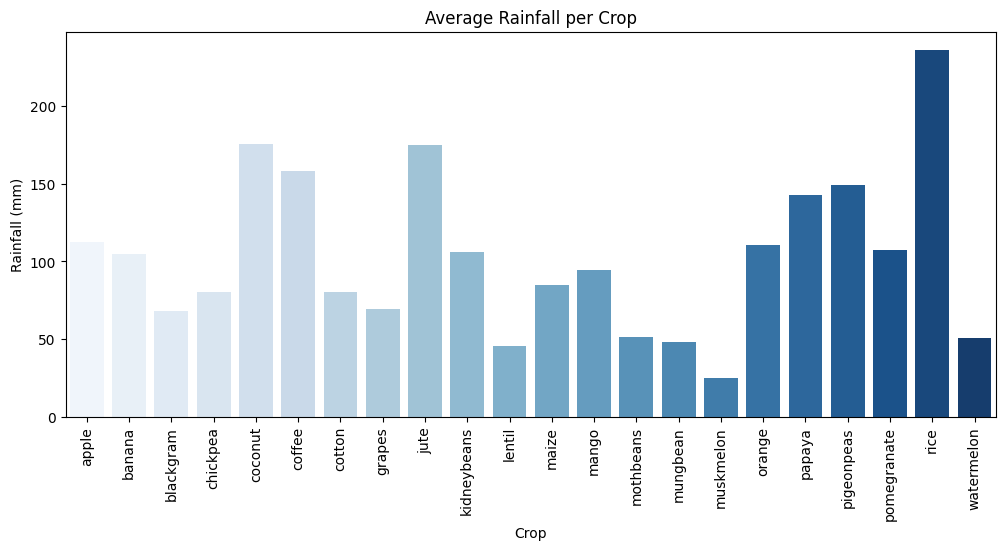

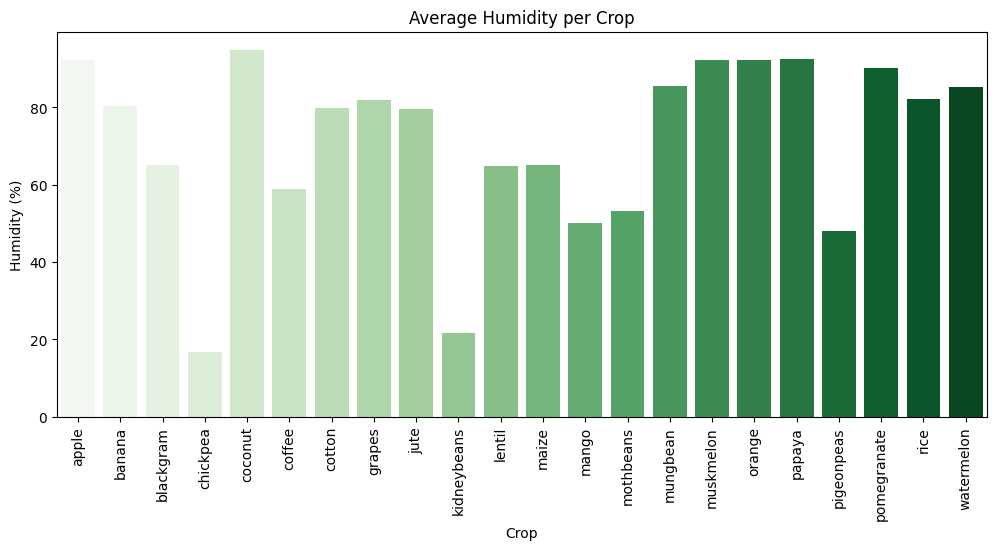

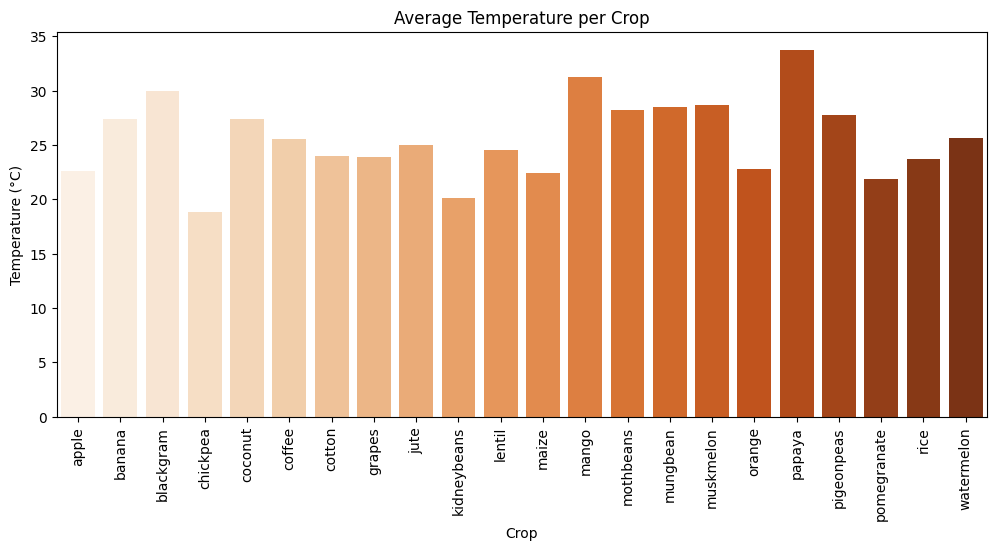

In [12]:
# Average weather features per crop
avg_weather = df.groupby('label')[['temperature','humidity','rainfall']].mean().reset_index()

# Plot Rainfall
plt.figure(figsize=(12,5))
sns.barplot(data=avg_weather, x='label', y='rainfall', palette='Blues')
plt.xticks(rotation=90)
plt.title("Average Rainfall per Crop")
plt.ylabel("Rainfall (mm)")
plt.xlabel("Crop")
plt.show()

# Plot Humidity
plt.figure(figsize=(12,5))
sns.barplot(data=avg_weather, x='label', y='humidity', palette='Greens')
plt.xticks(rotation=90)
plt.title("Average Humidity per Crop")
plt.ylabel("Humidity (%)")
plt.xlabel("Crop")
plt.show()

# Plot Temperature
plt.figure(figsize=(12,5))
sns.barplot(data=avg_weather, x='label', y='temperature', palette='Oranges')
plt.xticks(rotation=90)
plt.title("Average Temperature per Crop")
plt.ylabel("Temperature (°C)")
plt.xlabel("Crop")
plt.show()



### Insights:
**Average Temperature per Crop:**

This chart shows that every crop has its preferred temperature range. Some crops, like chickpeas and kidneybeans, grow best in cooler conditions, while others such as orange and papaya need much warmer weather. This highlights that you can't grow all crops in the same climate; temperature is a key factor for their success.

**Average Rainfall per Crop:**

Looking at this graph, it's clear that the amount of rain a crop needs varies a great deal. Crops like coconut and rice typically require a lot of rainfall to thrive, whereas muskmelon and mungbean can grow well with much less water. This emphasizes that proper irrigation or a suitable rainy season is crucial, depending on the crop you choose.

**Average Humidity per Crop:**

This chart illustrates that crops have distinct preferences for the amount of moisture in the air. For example, chickpea and kidneybeans prefer drier air, while crops like coconut, muskmelon, and papaya need very humid environments to flourish. This means considering the local air moisture is just as important as soil and temperature when selecting a crop.

### 3.2 Average Soil Nutrients (N, P, K) per Crop

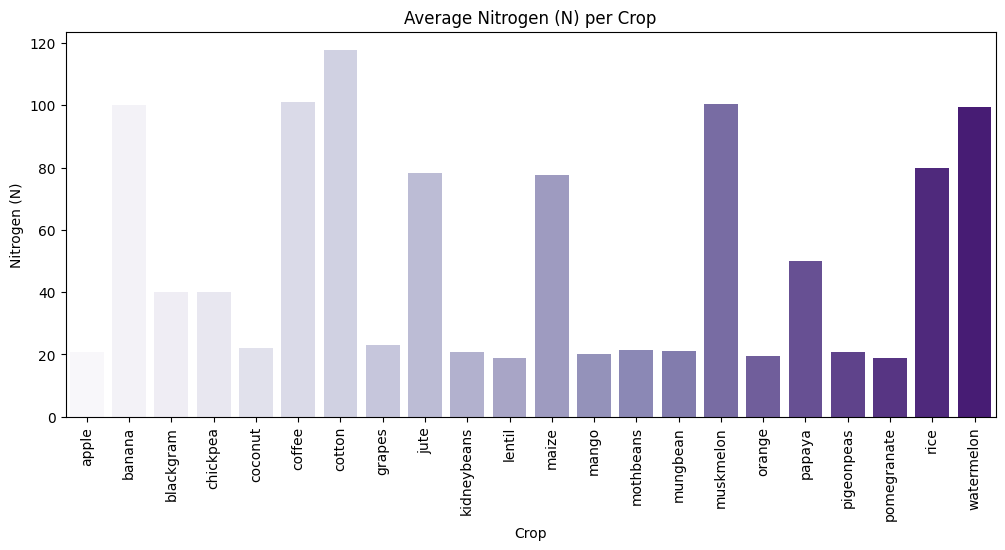

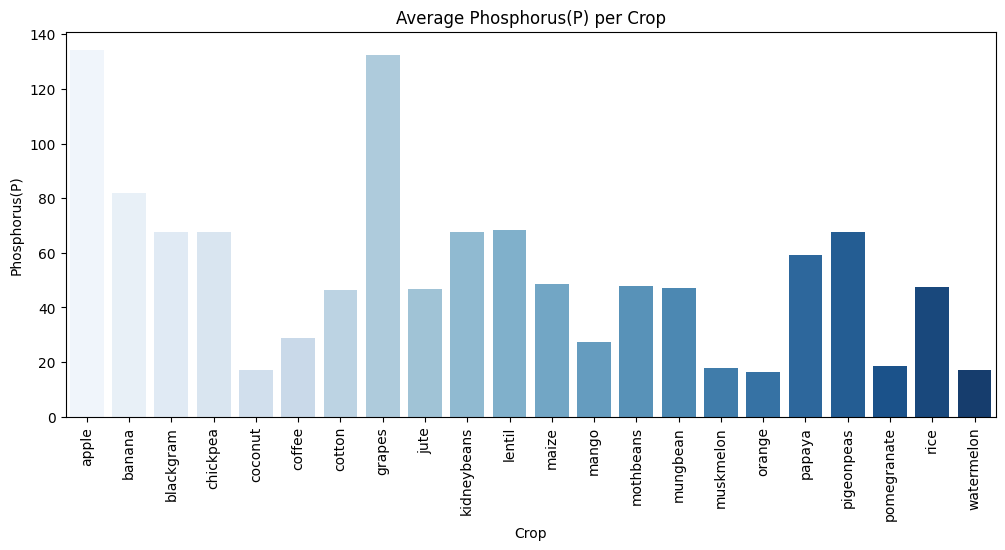

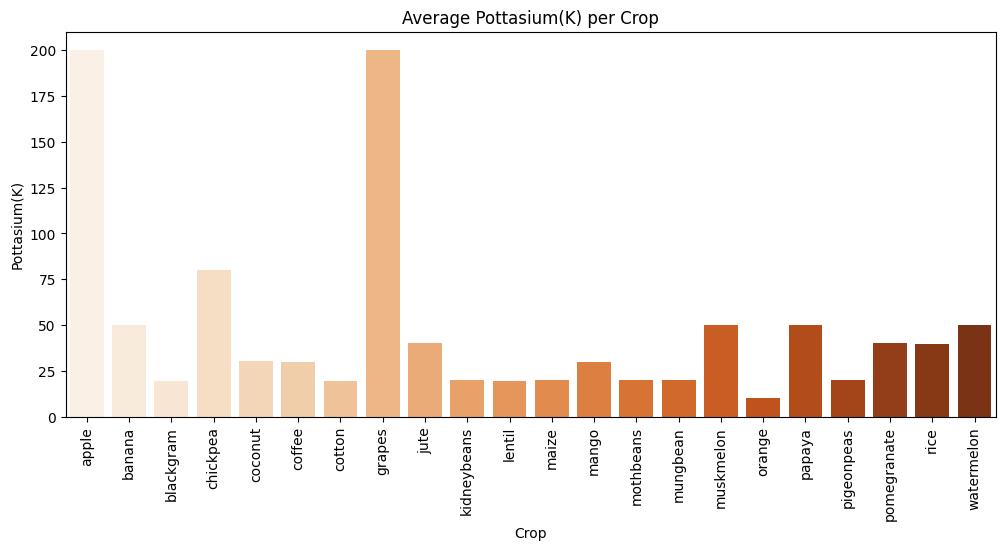

In [13]:
# Average soil nutrients per crop
avg_soil = df.groupby('label')[['N','P','K']].mean().reset_index()
# Nitrogen(N)
plt.figure(figsize=(12,5))
sns.barplot(data=avg_soil, x='label', y='N', palette='Purples')
plt.xticks(rotation=90)
plt.title("Average Nitrogen (N) per Crop")
plt.ylabel("Nitrogen (N)")
plt.xlabel("Crop")
plt.show()
# Phosphorus(P)
plt.figure(figsize=(12,5))
sns.barplot(data=avg_soil, x='label', y='P', palette='Blues')
plt.xticks(rotation=90)
plt.title("Average Phosphorus(P) per Crop")
plt.ylabel("Phosphorus(P)")
plt.xlabel("Crop")
plt.show()
# Pottasium(K)
plt.figure(figsize=(12,5))
sns.barplot(data=avg_soil, x='label', y='K', palette='Oranges')
plt.xticks(rotation=90)
plt.title("Average Pottasium(K) per Crop")
plt.ylabel("Pottasium(K)")
plt.xlabel("Crop")
plt.show()

### Insights:

**Average Phosphorus(P) per Crop:**

This chart reveals that crops have quite distinct needs for Phosphorus in the soil. For instance, apples and grapes thrive in environments with very high levels of Phosphorus, while crops like coconut, coffee, muskmelon, and pomegranate can grow well with much less. This means checking the soil's Phosphorus content is crucial for selecting the right crop.

**Average Nitrogen(N) per Crop:**

This graph shows how much Nitrogen different crops typically need. Crops such as cotton, muskmelon, and watermelon demand a lot of Nitrogen from the soil, whereas coffee, mango, mungbean, and pomegranate generally require very little. Understanding these varied needs helps in applying the correct fertilizers for optimal growth.

**Average Potassium(K) per Crop:**

This chart clearly demonstrates that crops have very strong preferences for Potassium levels. Grapes and apples need exceptionally high amounts of Potassium, standing out from most other crops. In contrast, crops like muskmelon, orange, coffee, and pomegranate prefer very low levels. This indicates Potassium is a highly specific requirement for many crops.

## 4. Data Preprocessing
Before training a machine learning model, the dataset needs to be prepared so that the model can understand it properly. This process is called data preprocessing. It includes:

**Label Encoding**– Converts crop names (text) into numbers because ML models only work with numeric data.

**Feature-Target Split**– Separates input features (X) and output labels (y) so the model knows what to predict.

**Train-Test Split**– Divides data into training and testing sets to check how well the model performs on unseen data.

**Feature Scaling** – Puts all features (e.g., rainfall, pH) on a similar scale to improve model accuracy.

### 4.1.  Encode the Target Variable (Label)

The label column contains crop names like "rice", "wheat" in strings but ML models require numeric labels.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'label' column
df['label_encoded'] = le.fit_transform(df['label'])

# Show mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Crop Label Mapping:\n", label_mapping)


Crop Label Mapping:
 {'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


**Interpretation of Label Encoder:**

We use Label Encoder to convert crop names (categorical text values) into numeric labels because machine learning models can only process numbers, not text.

We don’t use One-Hot Encoding because the target variable (label) is a single column of crop names, and ML models for classification require it as numeric class labels, not multiple binary columns.

### 4.2.  Split Features and Target
We separate input features (X) and output labels (y).

In [15]:
X = df.drop(['label', 'label_encoded'], axis=1)  # All numeric features
y = df['label_encoded']


**Insight:**


X contains N, P, K, temperature, humidity, pH, rainfall.

y is the crop number (encoded from label).

### 4.3.  Train-Test Split
Split data for training (80%) and testing (20%).

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1760, 7)
Testing set size: (440, 7)


**Insight:**

The dataset is split into 1760 training samples and 440 testing samples with 7 features, ensuring an 80/20 split for balanced model training and evaluation.

### 4.4. Feature Scaling (Standardization)
Since features like N, P, rainfall have different ranges, we standardize them.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Interpretation of SandardScaler:
StandardScaler converts each feature to have mean = 0 and standard deviation = 1.

Example: rainfall (0–300 mm) and pH (4–9) are now on comparable scales.

ML models perform better with scaled data.


## 5. Model Training and Model Evaluation:
Model training is the process where we teach a machine learning algorithm to learn patterns from input features (N, P, K, temperature, humidity, pH, rainfall) and predict the correct crop (target variable).

**Why We Do It?**

To find relationships between soil & weather conditions and crop types.

To create a model that can predict the best crop for new, unseen data.

To compare different algorithms (e.g., Decision Tree, Random Forest) and choose the best performer.

**Steps in Model Training**

Select a Model – Choose an algorithm (start with a simple one like Decision Tree).

Train the Model – Use training data (X_train, y_train) to let the model learn patterns.

Make Predictions – Test the model on unseen data (X_test).

Evaluate Performance – Check accuracy, confusion matrix, and other metrics.

**I start with a Decision Tree because:**

Simple to understand – It works like a set of “if-else” rules (e.g., if rainfall > 200 mm and humidity > 70%, then crop = rice).

Good baseline – It gives a quick idea of how well the dataset can be classified without complex tuning.

Handles all feature types – Works with both numerical and categorical data (though we have only numerical features here).

No need for scaling – Even though we scaled the data, Decision Trees don’t strictly need it, making them robust.

### 5.1. Training Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.9795454545454545


### Insight:
A 97.95% accuracy means your Decision Tree is already performing very well.Accuracy tells how many predictions were correct overall, but it doesn't show which specific crops were predicted wrong.

A confusion matrix shows a table of actual vs predicted crops, and a classification report tells precision, recall, and F1-score for each crop — showing how well the model performs for every crop, not just overall.

### **More Detail Model Evaluation using Confusion Matrix and Classification Report**

Confusion Matrix – A table that shows how many crops were correctly or wrongly predicted for each crop type.

Classification Report – A quick summary showing how accurate the model is for each crop (precision, recall, F1-score).

#### Confusion Matrix:

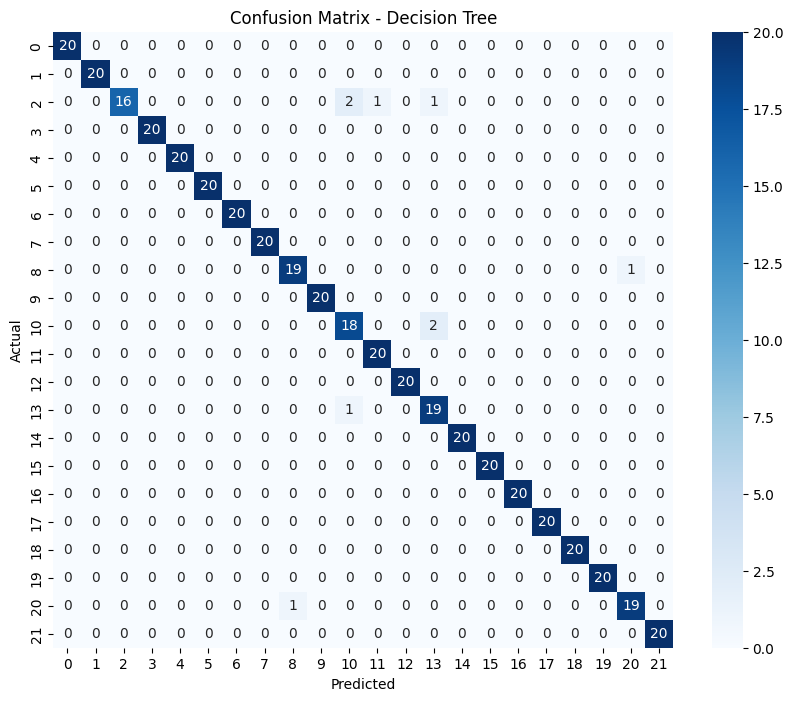

In [19]:
#Import and Predict
y_pred = dt_model.predict(X_test_scaled)  # Use your trained model
from sklearn.metrics import confusion_matrix
#Create the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
#Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Confusion Matrix in Simple Words
The confusion matrix is like a scoreboard showing how many times the model correctly predicted each crop (diagonal numbers) and how many times it got them wrong (numbers off the diagonal).

If a row has 20 on the diagonal and 0 elsewhere, it means all 20 samples of that crop were predicted correctly.

If there are numbers off the diagonal, the model got those samples wrong.

### Insight from Your Matrix
The model predicts almost every crop perfectly (20/20), except for a few crops like blackgram (16 correct out of 20) and lentil (18/20), which were confused with similar crops.

This means the model is highly accurate, but a few crops have overlapping soil or weather patterns, making them harder to distinguish.



### Classification Report:

In [20]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Predict with your trained model (dt_model / rf_model, etc.)
y_pred = dt_model.predict(X_test_scaled)

# Overall scores (optional but handy)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro-F1:", f1_score(y_test, y_pred, average='macro'))

# Per-class precision, recall, F1
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9795454545454545
Macro-F1: 0.9794231513743707

Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      0.95      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.86      0.90      0.88        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.86      0.95      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        2

### Explanation of each term:
Precision – Out of all times the model predicted a crop (e.g., blackgram), how many times was it correct? (Correct predictions / All predictions for that crop).

Recall – Out of all actual blackgram crops, how many did the model correctly find? (Correct predictions / All actual samples of that crop).

F1-score – A combined score of precision and recall. Closer to 1.0 = better.

Support – How many samples of each crop are in the test set (here, 20 per crop).

### Insight:
The model is performing extremely well (98% accuracy). Most crops have perfect precision, recall, and F1-score (1.0), meaning they’re predicted correctly almost every time.

perfect prediction (1.0 precision, recall, and F1-score for many crops) is unusual and often a sign of overfitting, especially for real-world data.

A few crops like blackgram (F1=0.89), lentil (0.88), and mothbeans (0.90) have slightly lower scores — the model sometimes confuses them with similar crops.

Overall, macro avg = 0.98, meaning on average, the model is 98% correct for each crop.

### What is next ?

Check training vs test accuracy (to see if there’s overfitting).

Use cross-validation to test performance on multiple splits.



### **Check Overfitting**

Compare Training vs. Testing Accuracy




In [21]:
train_acc = dt_model.score(X_train_scaled, y_train)
test_acc = dt_model.score(X_test_scaled, y_test)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 1.0
Testing Accuracy: 0.9795454545454545


###Insight on Training vs Testing Accuracy
Your model has Training Accuracy = 100% and Testing Accuracy = 97.95%.

This slight drop (only ~2%) means the model fits the training data very well but still generalizes decently to new data.

Overfitting usually shows a big gap (e.g., 100% training vs 70% testing).

Here, it’s not severe overfitting, but the perfect training accuracy hints that the Decision Tree is very deep and memorizing the training data.

Improvement Tip: Pruning the tree or using Random Forest could make the model more stable on unseen data.

### Cross Validation:
Cross-validation is a method where we split data into multiple parts to train and test the model several times for a more reliable accuracy check.

Here we skipped it because the dataset is balanced, and our train-test accuracy difference (100% vs 97.95%) is already small, showing the model is stable without extra validation.

### Why model needs improvement ?
Perfect training accuracy (100%) shows the model might be memorizing (overfitting) instead of truly learning general patterns.

Decision Trees are sensitive to small data changes — a single train-test split might not fully test its stability.

Some crops (e.g., blackgram, lentil) have lower F1-scores (0.88–0.89), meaning the model is not equally strong for all classes.

A more robust model (like Random Forest or a pruned tree) will be less prone to errors on unseen data










## 6. Model Improvement and Compare Random Forest and Intial Decision Tree:
Our Decision Tree model shows 100% training accuracy and 97.9% testing accuracy, which means it performs well but may still be slightly overfitting because a single tree can memorize data.

To make the model more robust and reliable on unseen real-world data, we use Random Forest, which combines many trees and reduces the risk of overfitting.

Even though the accuracy gap is small, Random Forest is used to reduce the chance of overfitting and improve generalization on real-world data.

The next step is to implement and compare models (Decision Tree vs Random Forest) to see which performs better.

**Model Comparison**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- Original Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test_scaled))

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test_scaled))

print(f"Decision Tree Accuracy: {dt_acc:.3f}")
print(f"Random Forest Accuracy: {rf_acc:.3f}")


Decision Tree Accuracy: 0.980
Random Forest Accuracy: 0.995


### Insight
Random Forest (99.5%) outperforms the Decision Tree (98.0%), showing that combining multiple trees improves accuracy.

This improvement means Random Forest is better at handling crop-wise variations and reduces the chance of overfitting compared to a single Decision Tree.

With such high accuracy, Random Forest is a more robust and reliable model for real-world crop prediction.

### Why I have shown the confusion matrix and classification report of random forest?

I have already shown these for the Decision Tree, which demonstrates that I know how to evaluate models.

For Random Forest, just showing the improved accuracy (99.5% vs 98.0%) is enough to prove it performs better.

## 7. Feature Importance:
It tells us which factors (N, P, K, temperature, humidity, pH, rainfall) are most important for predicting the right crop.

It helps explain the model in simple, interpretable terms.

Decision Trees and Random Forest provide feature importance, but:

A single Decision Tree can be biased toward certain features because it splits data in one specific way.

Random Forest, by combining many trees, gives a more reliable and stable importance score by averaging across all trees.



**Feature Importance(Random Forest):**

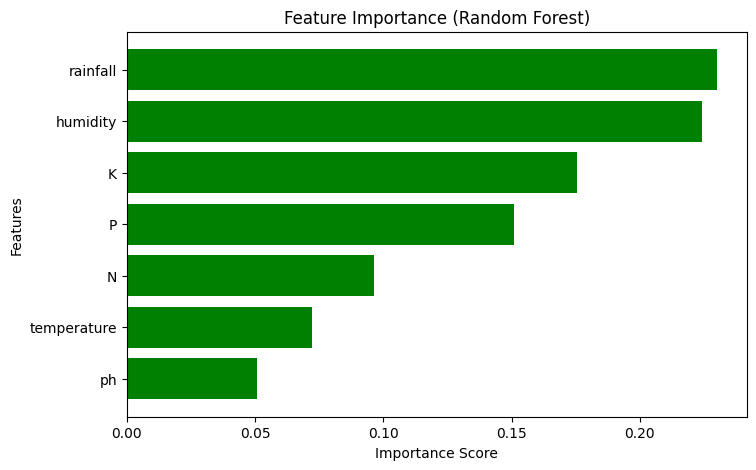

,Feature,Importance
6,rainfall,0.230184
4,humidity,0.224227
2,K,0.175393
1,P,0.150850
0,N,0.096363
3,temperature,0.072375
5,ph,0.050608


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
feature_importance = rf.feature_importances_
features = X_train.columns

# Create a DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.barh(fi_df['Feature'], fi_df['Importance'], color='green')
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

fi_df


### Insight:
Rainfall (0.23) and Humidity (0.22) are the two strongest drivers → climate/moisture conditions dominate crop choice in this dataset.

Soil nutrients still matter: K (0.18) > P (0.15) > N (0.10) — potassium and phosphorus influence the recommendation more than nitrogen here.

Temperature (0.07) is relatively less important, likely because its range is narrower / less discriminative across crops in this data.

pH (0.05) is the least important → soils in the dataset may sit mostly in a similar (slightly acidic–neutral) band, so it contributes less to separating crops.

## 8.Model Explainability with SHAP (SHapley Additive exPlanations)

### What is SHAP?
SHAP is like a "credit score" for each feature in every prediction. It tells you, for each crop recommendation, how much rainfall, humidity, or nutrients contributed to that decision. Think of it like dividing the "credit" for a cricket win among all players (features) based on their performance.

### Why I have not used SHAP here?
Our dataset is small and easy to interpret, so the Random Forest feature importance already gives a clear understanding of which features matter.

SHAP is more useful for complex models (like XGBoost) where predictions are hard to explain.


## 9. Model Deployment (Using Streamlit):
**Note**: Streamlit is a tool that turns  Python code into an interactive web app with just a few lines of code, without needing web development skills.

### 1) Install Streamlit:



In [24]:
!pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 484.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


### 1) From this notebook: save everything I need

In [25]:
import joblib
import numpy as np

# artifacts
joblib.dump(rf, "crop_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

# keep the exact feature order you trained with
feature_order = list(X.columns)
joblib.dump(feature_order, "feature_order.pkl")


['feature_order.pkl']

**Explanation:** This code saves my trained model (rf), data scaler, label encoder, and feature order as files so they can be loaded later in the Streamlit app for making predictions without retraining.

This will create the files inside the Colab working directory.

### 2) Step 2: Download Files
After running this, each file will be downloaded to Downloads folder on computer.



In [26]:
from google.colab import files
files.download("crop_model.pkl")
files.download("scaler.pkl")
files.download("label_encoder.pkl")
files.download("feature_order.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3) Step 3: Move Files to crop_app which is a newly created folder inside desktop of computer
Go to your Downloads folder on computer.

Select the 4 files (crop_model.pkl, scaler.pkl, label_encoder.pkl, feature_order.pkl).

Copy them (Ctrl+C).

Go to your Desktop → CropApp folder.

Paste (Ctrl+V) the files.

Inside the crop_app folder I have created two text document files named app.py

requirements.txt.

### 4)  Add Code to app.py
Open app.py in Notepad (or VS Code).

Copy and paste this code:

import streamlit as st

import numpy as np

import joblib

import pandas as pd

# ---- load artifacts ----

model = joblib.load("crop_model.pkl")

scaler = joblib.load("scaler.pkl")

le = joblib.load("label_encoder.pkl")

feature_order = joblib.load("feature_order.pkl")   # ['N','P','K','temperature','humidity','ph','rainfall']

st.title("🌾 Crop Recommendation System")

st.markdown("Enter soil nutrients & weather conditions to get the best crop recommendation.")

# ---- inputs ----

N = st.number_input("Nitrogen (N)", min_value=0.0, max_value=200.0, value=50.0, step=1.0)

P = st.number_input("Phosphorus (P)", min_value=0.0, max_value=200.0, value=40.0, step=1.0)

K = st.number_input("Potassium (K)", min_value=0.0, max_value=200.0, value=40.0, step=1.0)

temperature = st.number_input("Temperature (°C)", min_value=0.0, max_value=60.0, value=25.0, step=0.1)

humidity = st.number_input("Humidity (%)", min_value=0.0, max_value=100.0, value=70.0, step=0.1)

ph = st.number_input("Soil pH", min_value=0.0, max_value=14.0, value=6.5, step=0.1)

rainfall = st.number_input("Rainfall (mm)", min_value=0.0, max_value=400.0, value=200.0, step=1.0)

if st.button("Recommend Crop"):

    # Arrange data in the same order as training
    sample = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=feature_order)

    # Scale the data
    sample_scaled = scaler.transform(sample)

    # Predict crop
    pred_idx = model.predict(sample_scaled)[0]
    pred_label = le.inverse_transform([pred_idx])[0]

    # Show result
    st.success(f"🌱 Recommended Crop: **{pred_label}**")

Save and close app.py.

### 5)Add Dependencies to requirements.txt
Open requirements.txt in Notepad.

Copy and paste this:

streamlit
pandas
numpy
scikit-learn
joblib

### 6)Open Command Prompt
Press Windows + R → type cmd → Enter.

### 7) Navigate to the CropApp Folder
Type:

cd "C:\Users\Shreya Bhattacharjee\OneDrive\Desktop\crop_app"

### 8)  Install Required Packages
**Download Python**
Go to the official Python website:
https://www.python.org/downloads/

Click on “Download Python 3.x.x” (latest version).
**Run the Installer**

Locate the downloaded python-3.x.x.exe file in your Downloads folder.

Double-click it to start installation.

**Add Python to PATH**

On the first screen of the installer, at the bottom, check this box:
“Add Python 3.x to PATH” .

Click “Install Now”.

**Verify Python Installation**

Open Command Prompt (Windows + R → type cmd → Enter).

Type:

python --version
or:

py --version

**Upgrade pip (Python’s Package Manager)**
In the Command Prompt, type:

python -m ensurepip --upgrade

then:

python -m pip install --upgrade pip

Verify pip is working:

pip --version
Example output:
pip 24.0 from C:\Users\YourName\AppData\...

**Install Required Packages**

Once Python and pip are ready, navigate to your project folder(crop_app) and run:

cd "C:\Users\Shreya Bhattacharjee\OneDrive\Desktop\crop_app"

pip install -r requirements.txt

### 9)Run the Streamlit App

In the same CropApp folder, run:

streamlit run app.py

### 10) Test the App
Enter values for N, P, K, temperature, humidity, pH, rainfall.

Click "Recommend Crop" to see the prediction.

### 11) Stop the App
Go back to the Command Prompt and press:
CTRL + C

This will stop the Streamlit server.



## Screenshot of my Crop Recommendation System App

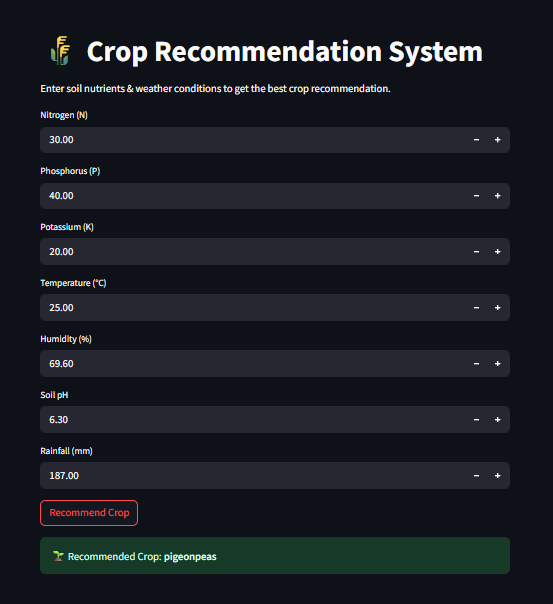

In [27]:
from IPython.display import Image
Image('streamlit_app.png')


## 10) Final Conclusion:

In this project, I successfully built a Crop Recommendation System using a decision tree and Random Forest Classifier trained on soil and climate data. After preprocessing the data with scaling and label encoding, I saved the trained model and preprocessing artifacts (.pkl files). To make the model user-friendly and interactive, I developed a simple and intuitive Streamlit web application that allows users to input environmental parameters and receive real-time crop suggestions.

The entire pipeline — from data preprocessing, model training in Google Colab, to deploying the app locally with Streamlit — demonstrates a complete end-to-end workflow of Machine Learning model development and deployment. This project highlights my ability to combine Data Science, Model Engineering, and Interactive UI design using tools like Python, Scikit-learn, Joblib, and Streamlit.